In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler #for train test splitting
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score#for decision tree object
from sklearn.compose import ColumnTransformer
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix  #for visualizing tree 
import datetime

In [29]:
sh1_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=0)
sh2_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=1)
sh3_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=2)
sh4_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=3)

In [30]:
sh1_df.head()

,Patient Name,Gender,Patient ID,Date,Age,Medicine Overdose,Medicine Overdose.1,Type,Temperature,Heart Rate,Pulse,BPSYSTOLIC,BPDIA,Respiratory Rate,Causes Respiratory Imbalance
0,Amelia Nixon,female,400,2019-07-15,40,False,0,0,98,69,66,92,60,15,Normal
1,Clara Hicks,female,401,2019-12-22,38,True,1,1,98,63,66,94,75,16,Mild
2,Mason Brown,male,402,2019-06-02,37,False,0,0,98,60,60,92,73,15,Normal
3,Michael Rice,male,403,2019-01-26,44,True,1,1,99,76,61,111,60,16,Mild
4,Eleanor Ritter,female,404,2019-01-24,39,True,1,1,99,86,62,104,69,13,Mild


In [31]:
sh1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Patient Name                  2000 non-null   object        
 1   Gender                        2000 non-null   object        
 2   Patient ID                    2000 non-null   int64         
 3   Date                          2000 non-null   datetime64[ns]
 4   Age                           2000 non-null   int64         
 5   Medicine Overdose             2000 non-null   bool          
 6   Medicine Overdose.1           2000 non-null   int64         
 7   Type                          2000 non-null   int64         
 8   Temperature                   2000 non-null   int64         
 9   Heart Rate                    2000 non-null   int64         
 10  Pulse                         2000 non-null   int64         
 11  BPSYSTOLIC                    

In [32]:
sh1_df.describe()

,Patient ID,Age,Medicine Overdose.1,Type,Temperature,Heart Rate,Pulse,BPSYSTOLIC,BPDIA,Respiratory Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1399.500000,42.488000,0.500500,0.500500,98.510500,78.986500,64.47500,105.216000,70.142500,14.024000
std,577.494589,4.635796,0.500125,0.500125,0.500015,11.616402,2.84876,9.005992,6.080023,1.425637
min,400.000000,35.000000,0.000000,0.000000,98.000000,60.000000,60.00000,90.000000,60.000000,12.000000
25%,899.750000,38.000000,0.000000,0.000000,98.000000,69.000000,62.00000,97.000000,65.000000,13.000000
50%,1399.500000,42.000000,1.000000,1.000000,99.000000,79.000000,65.00000,105.000000,70.000000,14.000000
75%,1899.250000,47.000000,1.000000,1.000000,99.000000,89.000000,67.00000,113.000000,75.000000,15.000000
max,2399.000000,50.000000,1.000000,1.000000,99.000000,99.000000,69.00000,120.000000,80.000000,16.000000


### Checking Similar Columns

In [33]:
sh1_df.head()

,Patient Name,Gender,Patient ID,Date,Age,Medicine Overdose,Medicine Overdose.1,Type,Temperature,Heart Rate,Pulse,BPSYSTOLIC,BPDIA,Respiratory Rate,Causes Respiratory Imbalance
0,Amelia Nixon,female,400,2019-07-15,40,False,0,0,98,69,66,92,60,15,Normal
1,Clara Hicks,female,401,2019-12-22,38,True,1,1,98,63,66,94,75,16,Mild
2,Mason Brown,male,402,2019-06-02,37,False,0,0,98,60,60,92,73,15,Normal
3,Michael Rice,male,403,2019-01-26,44,True,1,1,99,76,61,111,60,16,Mild
4,Eleanor Ritter,female,404,2019-01-24,39,True,1,1,99,86,62,104,69,13,Mild


In [34]:
sh1_df['Medicine Overdose.1'].equals(sh1_df['Type'])

True

In [35]:
sh1_df['Medicine Overdose'].replace({False:0,True:1},inplace=True)

In [38]:
sh1_df['Medicine Overdose.1'].equals(sh1_df['Medicine Overdose'])

True

In [11]:
## Medical Overdose, Type and Medical Overdose.1 are same

In [39]:
sh1_df.drop(columns=['Patient ID','Medicine Overdose.1','Type'],inplace=True)

In [40]:
sh1_df.head()

,Patient Name,Gender,Date,Age,Medicine Overdose,Temperature,Heart Rate,Pulse,BPSYSTOLIC,BPDIA,Respiratory Rate,Causes Respiratory Imbalance
0,Amelia Nixon,female,2019-07-15,40,0,98,69,66,92,60,15,Normal
1,Clara Hicks,female,2019-12-22,38,1,98,63,66,94,75,16,Mild
2,Mason Brown,male,2019-06-02,37,0,98,60,60,92,73,15,Normal
3,Michael Rice,male,2019-01-26,44,1,99,76,61,111,60,16,Mild
4,Eleanor Ritter,female,2019-01-24,39,1,99,86,62,104,69,13,Mild


### Checking Outliers

<AxesSubplot:xlabel='Age'>

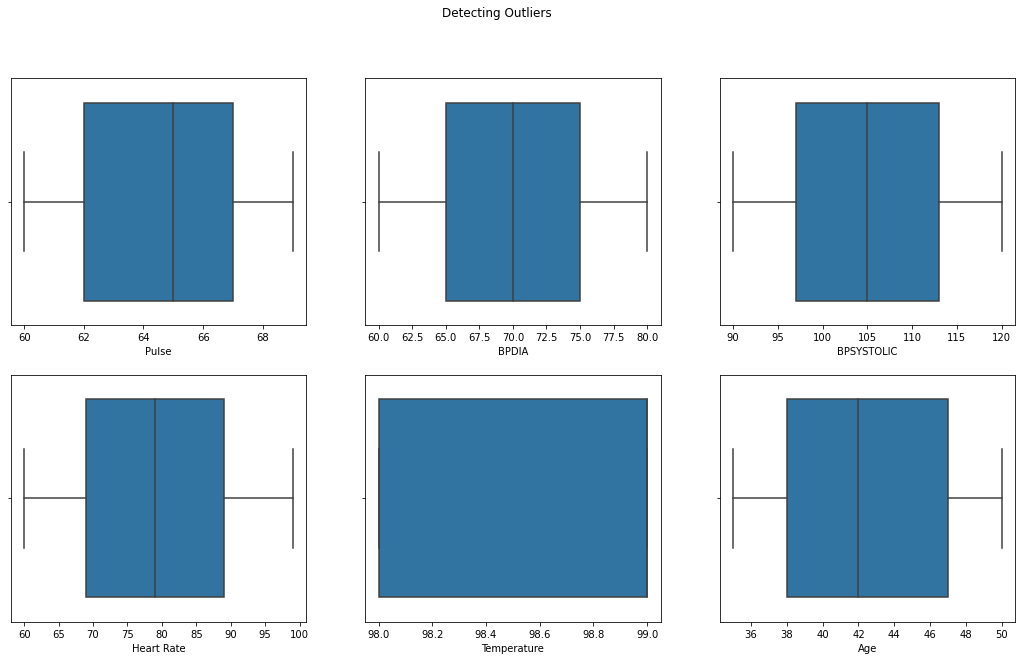

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Detecting Outliers')

sns.boxplot(ax=axes[0, 0],x=sh1_df['Pulse'])
sns.boxplot(ax=axes[0, 1],x=sh1_df['BPDIA'])
sns.boxplot(ax=axes[0, 2],x=sh1_df['BPSYSTOLIC'])
sns.boxplot(ax=axes[1, 0],x=sh1_df['Heart Rate'])
sns.boxplot(ax=axes[1, 1],x=sh1_df['Temperature'])
sns.boxplot(ax=axes[1, 2],x=sh1_df['Age'])


In [17]:
## Making label Binary

In [18]:
sh1_df['Causes Respiratory Imbalance'].replace({'Mild':1,'Normal':0},inplace=True)

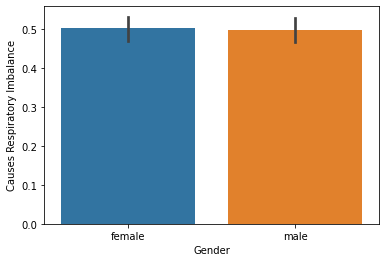

In [19]:
ax= sns.barplot(x="Gender", y="Causes Respiratory Imbalance", data=sh1_df)

In [20]:
## Balanced Gender

In [21]:
sh1_df['Gender'].replace({'female':0,'male':1},inplace=True)

In [22]:
X=sh1_df.drop(columns=['Date','Patient Name','Causes Respiratory Imbalance'],axis=1)
y=sh1_df['Causes Respiratory Imbalance']

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Function for transforming features

In [24]:
def transf_pipeline(train,test,norm_columns=[],cat_columns=[]):
    one_hot_encoder=OneHotEncoder()
    sc=StandardScaler()
    transormer=ColumnTransformer([('one_hot',one_hot_encoder,cat_columns),('sc',sc,norm_columns)],remainder='passthrough')
    X_train=transormer.fit_transform(train)
    X_test=transormer.transform(test)
    return X_train,X_test

In [25]:
stand_col=['Temperature','Age','Pulse','Heart Rate','BPSYSTOLIC','BPDIA','Respiratory Rate']

In [26]:
# cat_col=['Respiratory Rate']

In [27]:
X_train,X_test=transf_pipeline(X_train,X_test,stand_col)

In [28]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,-1.006270,1.404330,-0.868627,0.259473,0.534844,1.619562,-1.422168,1.0,0.0
1,-1.006270,-0.316630,-0.160988,-1.452516,1.643328,-0.518609,0.667335,1.0,1.0
2,0.993769,1.404330,-0.160988,0.516272,1.643328,0.797188,0.667335,0.0,1.0
3,0.993769,-0.316630,0.192832,0.601871,-1.460428,-0.189660,-0.029166,0.0,1.0
4,0.993769,0.758970,1.254290,-0.853320,0.534844,0.303764,1.363836,1.0,1.0
...,...,...,...,...,...,...,...,...,...
1595,-1.006270,-1.177109,-0.160988,1.029869,-0.130247,0.961663,-0.725667,1.0,1.0
1596,-1.006270,1.619449,-1.576265,0.002675,1.643328,0.303764,0.667335,0.0,0.0
1597,-1.006270,0.113610,-0.868627,0.088274,0.202298,1.455087,-1.422168,0.0,1.0
1598,-1.006270,0.543850,0.192832,0.345073,-0.241095,1.619562,-0.725667,1.0,1.0


In [29]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8
0,-1.006270,-1.607349,0.192832,1.029869,1.089086,0.632714,-0.029166,0.0,1.0
1,-1.006270,-0.961989,-0.514807,-1.366916,1.310782,0.797188,-0.029166,1.0,0.0
2,0.993769,1.404330,-1.222446,1.372266,1.310782,-0.847559,-1.422168,0.0,1.0
3,0.993769,-1.392229,-0.868627,-1.538115,1.532479,-0.189660,-0.725667,1.0,0.0
4,0.993769,-0.101510,0.192832,-0.168524,-0.462792,0.797188,-0.725667,1.0,1.0
...,...,...,...,...,...,...,...,...,...
395,0.993769,-0.531749,0.192832,-0.682121,0.978237,1.619562,-0.029166,1.0,1.0
396,0.993769,1.189210,-1.576265,0.601871,0.978237,1.290613,-1.422168,0.0,0.0
397,-1.006270,-0.746869,0.900470,-0.767720,0.202298,-0.354135,-0.725667,1.0,0.0
398,-1.006270,-1.177109,0.900470,-0.596521,1.421631,1.619562,-1.422168,0.0,1.0


### Model Evaluation Function

In [30]:
def class_report(y_test,y_pred):
    accuracy =accuracy_score(y_test,y_pred)
    classification = classification_report(y_test,y_pred)
    print()
    print('============================== Model Evaluation ==============================')
    print()
    print("Classification report:" "\n", classification) 
    print()
    return accuracy

### Confusion Matrix Function

In [31]:
def conf_matrix(y_test,y_pred,acc):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(acc)
    plt.title(all_sample_title, size = 25)

## KNN


In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = classifier_KNN.predict(X_test)

In [34]:
accuracy=class_report(y_test,y_pred)


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.95      0.94      0.94       200

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400




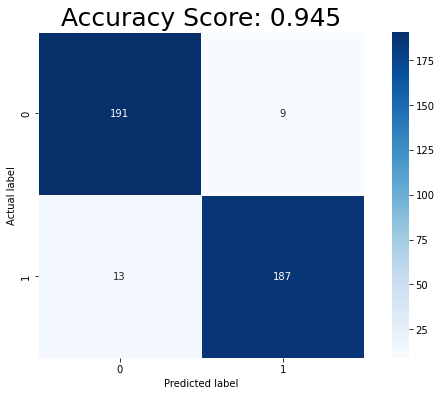

In [35]:
conf_matrix(y_test,y_pred,accuracy)

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred = classifier_NB.predict(X_test)


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




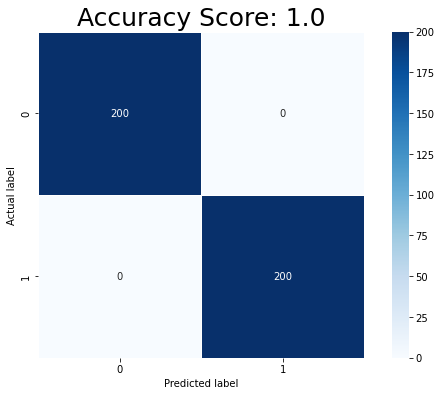

In [37]:
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## SVM

In [38]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'poly', random_state = 0)
classifier_SVM.fit(X_train, y_train)
y_pred = classifier_SVM.predict(X_test)


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




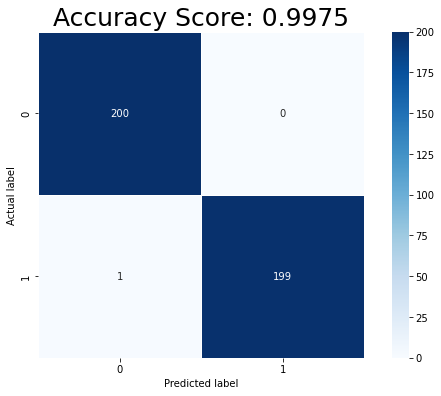

In [39]:
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




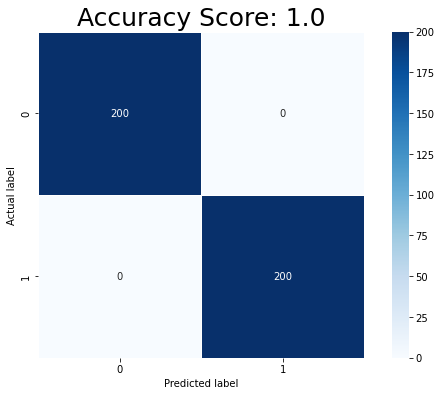

In [42]:
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

In [43]:
accuracy

1.0

## Per Hour Analysis

In [63]:
sh2_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=1)

In [64]:
sh2_df.head()

,Patient Name,Patient ID,Time,Date,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar
0,Amelia Nixon,57,00:00:00,2021-08-01,40,96,81,99,120,0,Low
1,Amelia Nixon,57,01:00:00,2021-08-01,40,96,110,102,86,1,Normal
2,Amelia Nixon,57,02:00:00,2021-08-01,40,98,116,116,90,1,Normal
3,Amelia Nixon,57,03:00:00,2021-08-01,40,97,119,108,99,1,Normal
4,Amelia Nixon,57,04:00:00,2021-08-01,40,98,89,73,88,0,Low


In [65]:
sh2_df['Patient Name'].nunique()

1

In [66]:
sh2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Patient Name      744 non-null    object        
 1   Patient ID        744 non-null    int64         
 2   Time              744 non-null    object        
 3   Date              744 non-null    datetime64[ns]
 4   Age               744 non-null    int64         
 5   Body Temperature  744 non-null    int64         
 6   Heart Rate        744 non-null    int64         
 7   Pulse             744 non-null    int64         
 8   Blood Pressure    744 non-null    int64         
 9   Sugar Catogery    744 non-null    int64         
 10  Blood Sugar       744 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 64.1+ KB


In [67]:
sh2_df['Time']

0                 00:00:00
1                 01:00:00
2                 02:00:00
3                 03:00:00
4                 04:00:00
              ...         
739    1900-01-15 19:00:00
740    1900-01-15 20:00:00
741    1900-01-15 21:00:00
742    1900-01-15 22:00:00
743    1900-01-15 23:00:00
Name: Time, Length: 744, dtype: object

In [68]:
## Time feature should only have time 

In [69]:
sh2_df['Time'] = pd.to_datetime(sh2_df['Time'].astype(str))
sh2_df['Time'] = pd.to_datetime(sh2_df['Time']).dt.time

In [70]:
sh2_df['Time'] 

0      00:00:00
1      01:00:00
2      02:00:00
3      03:00:00
4      04:00:00
         ...   
739    19:00:00
740    20:00:00
741    21:00:00
742    22:00:00
743    23:00:00
Name: Time, Length: 744, dtype: object

In [71]:
sh2_df['Time'] = [datetime.datetime.strptime(str(d) ,"%H:%M:%S") for d in sh2_df['Time']]

In [50]:
sh2_df['Time']

0      00:00:00
1      01:00:00
2      02:00:00
3      03:00:00
4      04:00:00
         ...   
739    19:00:00
740    20:00:00
741    21:00:00
742    22:00:00
743    23:00:00
Name: Time, Length: 744, dtype: object

In [51]:
## Adding hour as a feature

In [72]:
sh2_df['Hour'] = sh2_df.Time.dt.hour

In [73]:
sh2_df['Hour']

0       0
1       1
2       2
3       3
4       4
       ..
739    19
740    20
741    21
742    22
743    23
Name: Hour, Length: 744, dtype: int64

In [74]:
## Setting Date and Hour as index for better analysis

In [75]:
sh2_df.set_index(['Date','Hour'], inplace=True)

In [76]:
sh2_df.head()


Patient Name  Patient ID                Time  Age  \
Date       Hour                                                      
2021-08-01 0     Amelia Nixon          57 1900-01-01 00:00:00   40   
           1     Amelia Nixon          57 1900-01-01 01:00:00   40   
           2     Amelia Nixon          57 1900-01-01 02:00:00   40   
           3     Amelia Nixon          57 1900-01-01 03:00:00   40   
           4     Amelia Nixon          57 1900-01-01 04:00:00   40   

                 Body Temperature  Heart Rate  Pulse  Blood Pressure  \
Date       Hour                                                        
2021-08-01 0                   96          81     99             120   
           1                   96         110    102              86   
           2                   98         116    116              90   
           3                   97         119    108              99   
           4                   98          89     73              88   

                 Sugar Catogery Blood Sugar  
Date       Hour                              
2021-08-01 0                  0         Low  
           1                  1      Normal  
           2                  1      Normal  
           3                  1      Normal  
           4                  0         Low

<AxesSubplot:xlabel='Date,Hour', ylabel='Sugar Category'>

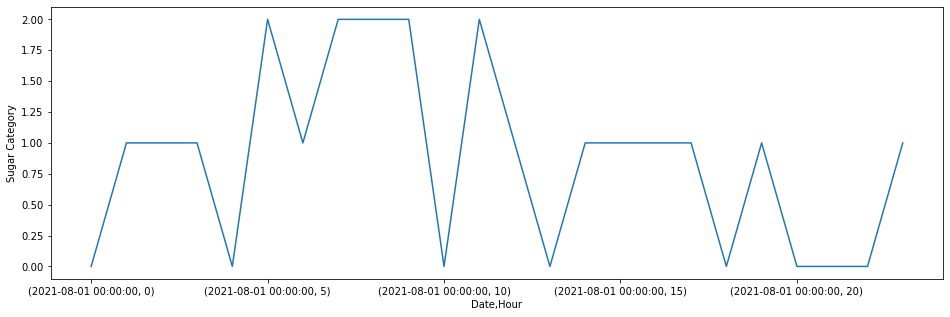

In [77]:
sh2_df.loc['2021-08-01']['Sugar Catogery'].plot(figsize=(16,5),ylabel="Sugar Category")

In [849]:
### Adding day as a feature

In [78]:
sh2_df['Day'] = sh2_df.index.get_level_values(0).day

In [79]:
sh2_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 744 entries, (Timestamp('2021-08-01 00:00:00'), 0) to (Timestamp('2021-08-30 00:00:00'), 23)
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Patient Name      744 non-null    object        
 1   Patient ID        744 non-null    int64         
 2   Time              744 non-null    datetime64[ns]
 3   Age               744 non-null    int64         
 4   Body Temperature  744 non-null    int64         
 5   Heart Rate        744 non-null    int64         
 6   Pulse             744 non-null    int64         
 7   Blood Pressure    744 non-null    int64         
 8   Sugar Catogery    744 non-null    int64         
 9   Blood Sugar       744 non-null    object        
 10  Day               744 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 67.5+ KB


In [80]:
sh2_df.tail()

Patient Name  Patient ID                Time  Age  \
Date       Hour                                                      
2021-08-30 19    Amelia Nixon          57 1900-01-01 19:00:00  756   
           20    Amelia Nixon          57 1900-01-01 20:00:00  757   
           21    Amelia Nixon          57 1900-01-01 21:00:00  758   
           22    Amelia Nixon          57 1900-01-01 22:00:00  759   
           23    Amelia Nixon          57 1900-01-01 23:00:00  760   

                 Body Temperature  Heart Rate  Pulse  Blood Pressure  \
Date       Hour                                                        
2021-08-30 19                  99         109    122             101   
           20                  99          78     77              99   
           21                  99          72     90              90   
           22                  99         115    107              98   
           23                  99         113    107              99   

                 Sugar Catogery Blood Sugar  Day  
Date       Hour                                   
2021-08-30 19                 2        High   30  
           20                 2        High   30  
           21                 1      Normal   30  
           22                 2        High   30  
           23                 1      Normal   30

In [81]:
sh2_df['Sugar Catogery'].value_counts()

1    274
2    236
0    234
Name: Sugar Catogery, dtype: int64

In [82]:
sh2_df['Age'].value_counts()

40     24
514     1
516     1
517     1
518     1
       ..
282     1
283     1
284     1
285     1
760     1
Name: Age, Length: 721, dtype: int64

### Checking and Removing Outliers

<AxesSubplot:xlabel='Age'>

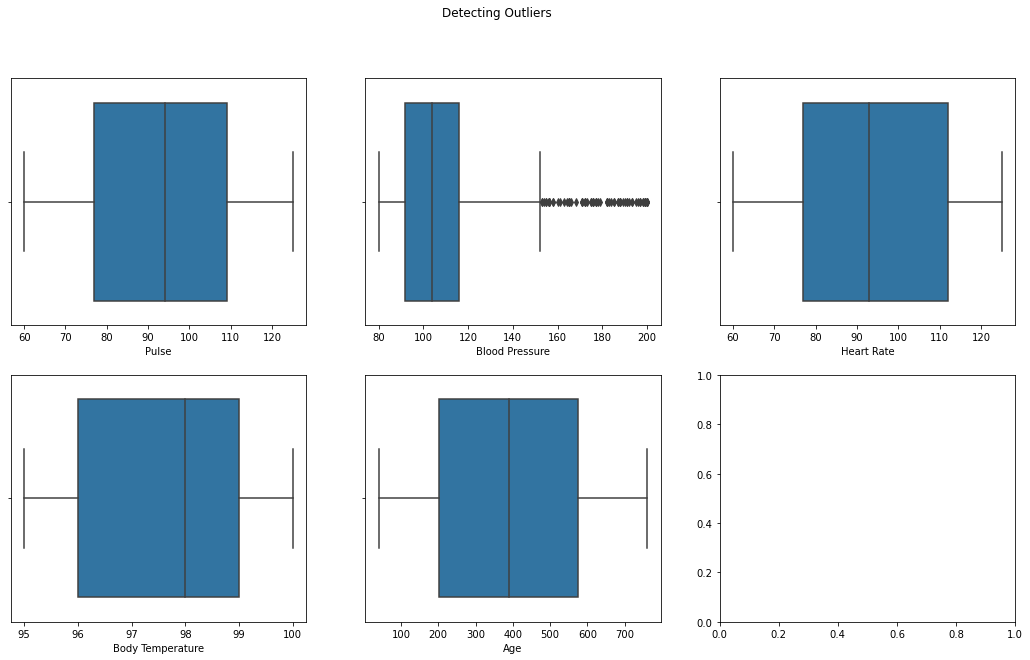

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Detecting Outliers')

sns.boxplot(ax=axes[0, 0],x=sh2_df['Pulse'])
sns.boxplot(ax=axes[0, 1],x=sh2_df['Blood Pressure'])
sns.boxplot(ax=axes[0, 2],x=sh2_df['Heart Rate'])
sns.boxplot(ax=axes[1, 0],x=sh2_df['Body Temperature'])
sns.boxplot(ax=axes[1, 1],x=sh2_df['Age'])

### Remove outliers function

In [84]:
def remove_outlier(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    df[col]= np.where(df[col] <(Q1-1.5*IQR),Q1-1.5*IQR ,df[col])
    df[col] = np.where(df[col]>(Q3+1.5*IQR),Q3+1.5*IQR ,df[col])

In [85]:
remove_outlier(sh2_df,'Blood Pressure')

<AxesSubplot:xlabel='Blood Pressure'>

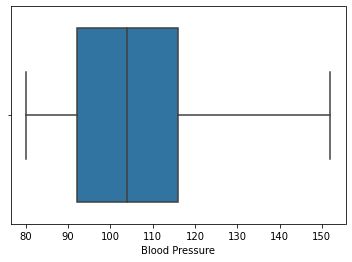

In [86]:
sns.boxplot(x=sh2_df['Blood Pressure'])

In [87]:
sh2_df['Age'].value_counts()

40     24
514     1
516     1
517     1
518     1
       ..
282     1
283     1
284     1
285     1
760     1
Name: Age, Length: 721, dtype: int64

In [813]:
sh2_df['Age']=40

In [814]:
sh2_df.head()

Patient Name  Patient ID                Time  Age  \
Date       Hour                                                      
2021-08-01 0     Amelia Nixon          57 1900-01-01 00:00:00   40   
           1     Amelia Nixon          57 1900-01-01 01:00:00   40   
           2     Amelia Nixon          57 1900-01-01 02:00:00   40   
           3     Amelia Nixon          57 1900-01-01 03:00:00   40   
           4     Amelia Nixon          57 1900-01-01 04:00:00   40   

                 Body Temperature  Heart Rate  Pulse  Blood Pressure  \
Date       Hour                                                        
2021-08-01 0                   96          81     99           120.0   
           1                   96         110    102            86.0   
           2                   98         116    116            90.0   
           3                   97         119    108            99.0   
           4                   98          89     73            88.0   

                 Sugar Catogery Blood Sugar  Day  
Date       Hour                                   
2021-08-01 0                  0         Low    1  
           1                  1      Normal    1  
           2                  1      Normal    1  
           3                  1      Normal    1  
           4                  0         Low    1

In [88]:
sh2_df = sh2_df.reset_index(level=1)

In [89]:
sh2_df

,Hour,Patient Name,Patient ID,Time,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar,Day
Date,,,,,,,,,,,,
2021-08-01,0,Amelia Nixon,57,1900-01-01 00:00:00,40,96,81,99,120.0,0,Low,1
2021-08-01,1,Amelia Nixon,57,1900-01-01 01:00:00,40,96,110,102,86.0,1,Normal,1
2021-08-01,2,Amelia Nixon,57,1900-01-01 02:00:00,40,98,116,116,90.0,1,Normal,1
2021-08-01,3,Amelia Nixon,57,1900-01-01 03:00:00,40,97,119,108,99.0,1,Normal,1
2021-08-01,4,Amelia Nixon,57,1900-01-01 04:00:00,40,98,89,73,88.0,0,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,19,Amelia Nixon,57,1900-01-01 19:00:00,756,99,109,122,101.0,2,High,30
2021-08-30,20,Amelia Nixon,57,1900-01-01 20:00:00,757,99,78,77,99.0,2,High,30
2021-08-30,21,Amelia Nixon,57,1900-01-01 21:00:00,758,99,72,90,90.0,1,Normal,30


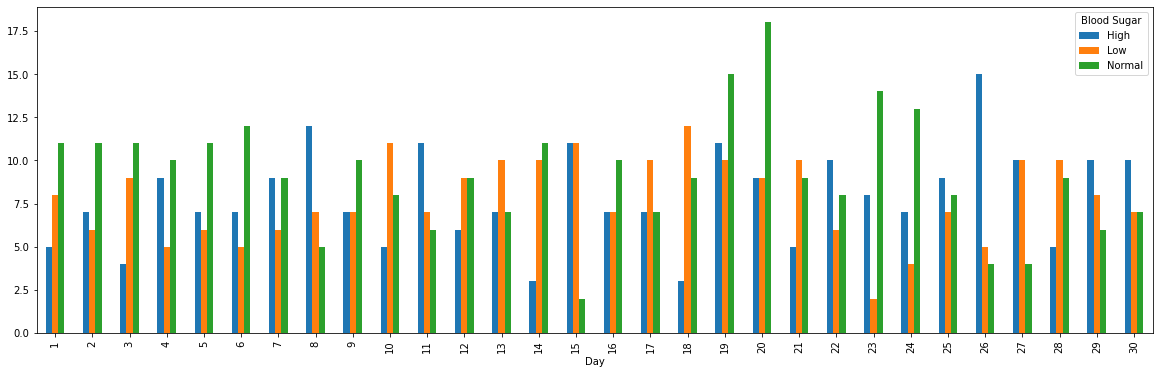

In [98]:
sh2_df_day=sh2_df.pivot_table(index='Day', columns='Blood Sugar',  aggfunc='size')
sh2_df_day.plot(kind='bar',figsize=(20,6));

In [91]:
## Variations in blood Sugar level by each day

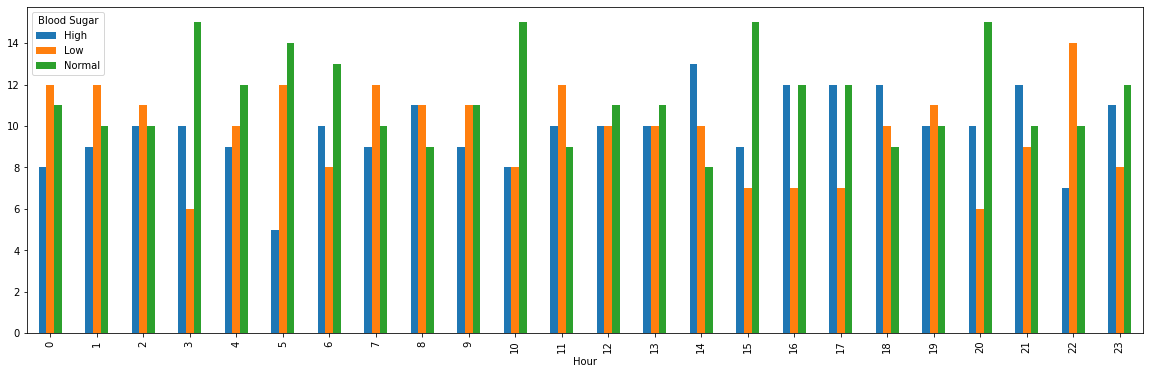

In [92]:
sh2_df_hr=sh2_df.pivot_table(index='Hour', columns='Blood Sugar',  aggfunc='size')
sh2_df_hr.plot(kind='bar',figsize=(20,6));

In [93]:
## Variations in blood Sugar level by hour

In [562]:
sh2_df.drop(columns=['Blood Sugar','Patient Name','Time','Patient ID'],axis=1,inplace=True)

In [608]:
sh2_df['Body Temperature'].mean()

97.54032258064517

In [614]:
X=sh2_df.drop(columns=['Sugar Catogery','Age'],axis=1)
y=sh2_df['Sugar Catogery']

In [621]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [616]:
norm_col=['Body Temperature','Heart Rate','Blood Pressure','Pulse']

In [622]:
X_train,X_test=transf_pipeline(X_train,X_test,X.columns)

In [623]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,1.663051,-0.304917,-0.775461,-1.000639,0.068891,0.528077
1,-1.522395,-0.882706,-0.620595,-0.422191,-1.198349,-1.231194
2,-0.219258,-1.460494,-0.568972,-0.474778,-0.905909,0.645362
3,-0.798430,-0.882706,-1.704661,-0.948053,-0.808429,1.700925
4,0.359914,0.850660,0.411850,1.418323,-0.954649,0.645362
...,...,...,...,...,...,...
590,-0.074465,0.272872,-0.414106,-1.736844,-0.321029,1.583640
591,-1.667188,-0.882706,-0.930328,-1.421328,0.458811,-0.762055
592,-0.943223,1.428449,-1.291684,-1.105811,2.164712,1.231786
593,-0.653637,0.272872,1.599161,1.681253,0.215111,0.879931


## KNN


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.27      0.37      0.31        46
           1       0.39      0.39      0.39        57
           2       0.34      0.22      0.27        46

    accuracy                           0.33       149
   macro avg       0.33      0.32      0.32       149
weighted avg       0.34      0.33      0.33       149




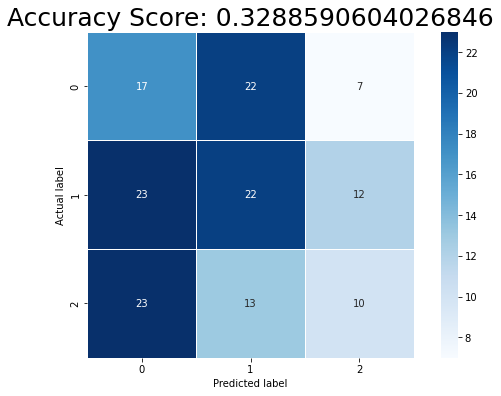

In [624]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)
y_pred=classifier_KNN.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## Naive Bayes


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.27      0.07      0.11        46
           1       0.43      0.77      0.55        57
           2       0.33      0.26      0.29        46

    accuracy                           0.40       149
   macro avg       0.35      0.37      0.32       149
weighted avg       0.35      0.40      0.33       149




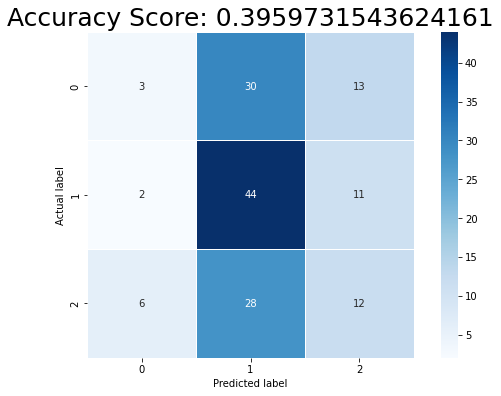

In [625]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred = classifier_NB.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## SVM


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.26        46
           1       0.43      0.79      0.56        57
           2       0.36      0.17      0.24        46

    accuracy                           0.42       149
   macro avg       0.40      0.39      0.35       149
weighted avg       0.40      0.42      0.37       149




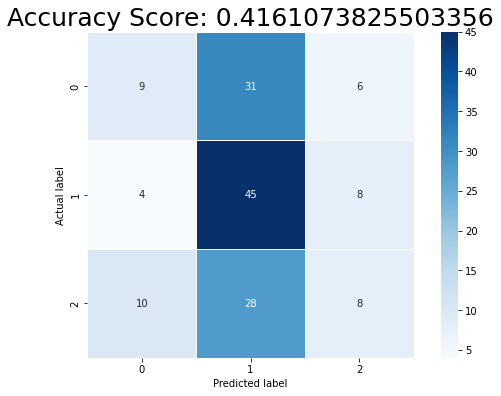

In [626]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'poly', random_state = 0)
classifier_SVM.fit(X_train, y_train)
y_pred = classifier_SVM.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## Random Forest


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.46      0.41        46
           1       0.44      0.46      0.45        57
           2       0.36      0.26      0.30        46

    accuracy                           0.40       149
   macro avg       0.39      0.39      0.39       149
weighted avg       0.39      0.40      0.39       149




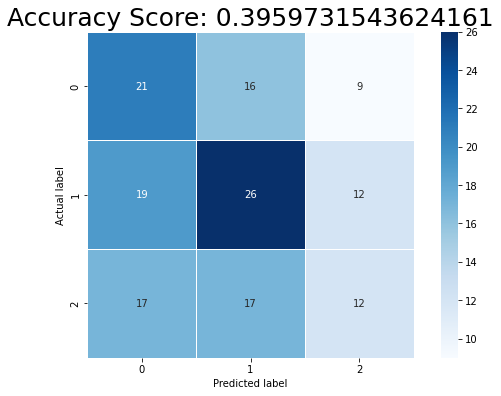

In [627]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## Per Month

In [820]:
sh3_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=2)

In [821]:
sh3_df.head()

,Patient Name,Patient ID,Date,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar
0,Amelia Nixon,57,2021-01-01 10:00:00.000,40,96,109,102,115,1,Normal
1,Amelia Nixon,57,2021-01-02 09:59:59.995,40,97,67,100,100,0,Low
2,Amelia Nixon,57,2021-01-03 09:59:59.995,40,96,116,109,112,0,Low
3,Amelia Nixon,57,2021-01-04 09:59:59.995,40,99,93,85,114,0,Low
4,Amelia Nixon,57,2021-01-05 09:59:59.995,40,100,77,63,166,0,Low


In [822]:
sh3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Patient Name      365 non-null    object        
 1   Patient ID        365 non-null    int64         
 2   Date              365 non-null    datetime64[ns]
 3   Age               365 non-null    int64         
 4   Body Temperature  365 non-null    int64         
 5   Heart Rate        365 non-null    int64         
 6   Pulse             365 non-null    int64         
 7   Blood Pressure    365 non-null    int64         
 8   Sugar Catogery    365 non-null    int64         
 9   Blood Sugar       365 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 28.6+ KB


In [852]:
## Adding Month, Hour and Date as feature

In [823]:
sh3_df['Month']=sh3_df['Date'].dt.month

In [824]:
sh3_df['Day']=sh3_df['Date'].dt.day

In [825]:
sh3_df['Date']=pd.to_datetime(sh3_df['Date'].dt.date)

In [826]:
sh3_df.set_index(pd.to_datetime(sh3_df['Date']),inplace=True)

In [827]:
sh3_df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

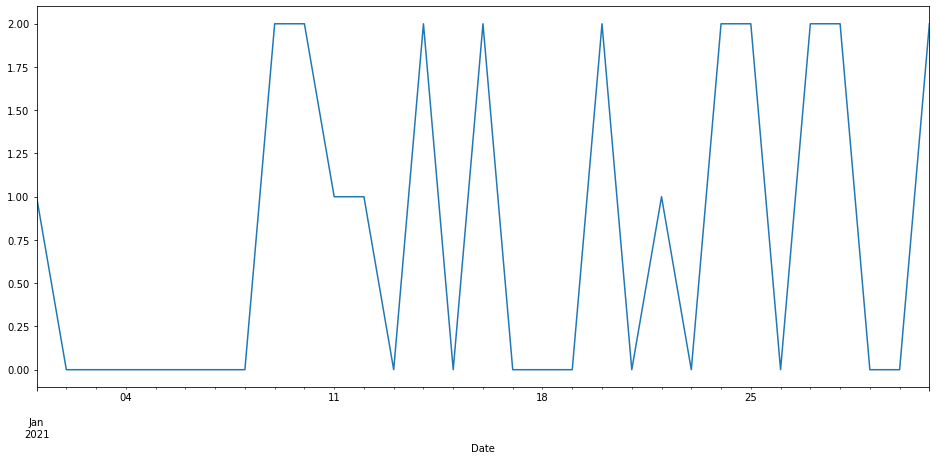

In [828]:
sh3_df.loc['2021-01-01':'2021-01-31']['Sugar Catogery'].plot(figsize=(16,7));

In [853]:
## Variations in blood Sugar level in the month of Jan. It was low in this the start of the month

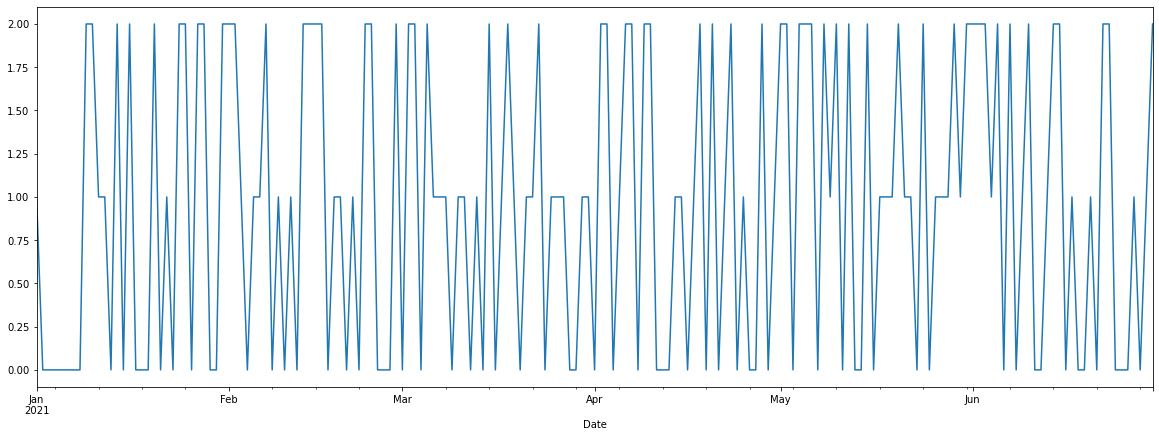

In [829]:
sh3_df.loc['2021-01':'2021-06']['Sugar Catogery'].plot(figsize=(20,7));

In [854]:
## Variations in blood Sugar level for 1st 6 months

In [685]:
sh3_df.head()

,Patient Name,Patient ID,Date,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar,Month,Day
Date,,,,,,,,,,,,
2021-01-01,Amelia Nixon,57,2021-01-01,40,96,109,102,115,1,Normal,1,1
2021-01-02,Amelia Nixon,57,2021-01-02,40,97,67,100,100,0,Low,1,2
2021-01-03,Amelia Nixon,57,2021-01-03,40,96,116,109,112,0,Low,1,3
2021-01-04,Amelia Nixon,57,2021-01-04,40,99,93,85,114,0,Low,1,4
2021-01-05,Amelia Nixon,57,2021-01-05,40,100,77,63,166,0,Low,1,5


In [830]:
sh3_df['Age']=40

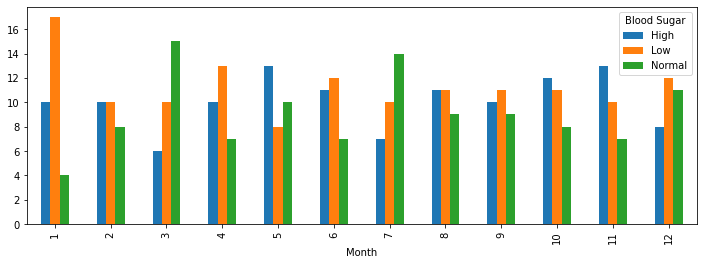

In [832]:
sh3_df_month=sh3_df.pivot_table(index='Month', columns='Blood Sugar',  aggfunc='size')
sh3_df_month.plot(kind='bar',figsize=(12,4));

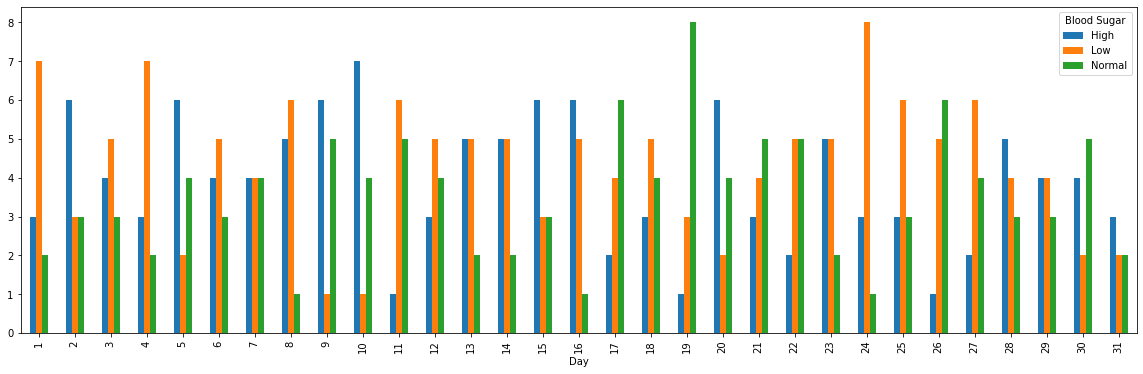

In [836]:
sh3_df_day=sh3_df.pivot_table(index='Day', columns='Blood Sugar',  aggfunc='size')
sh3_df_day.plot(kind='bar',figsize=(20,6));

In [855]:
##Dropping unecessary features

In [687]:
sh3_df.drop(columns=['Patient Name','Patient ID','Blood Sugar','Date','Age'],axis=1,inplace=True)

### Checking and Removing outliers

<AxesSubplot:xlabel='Body Temperature'>

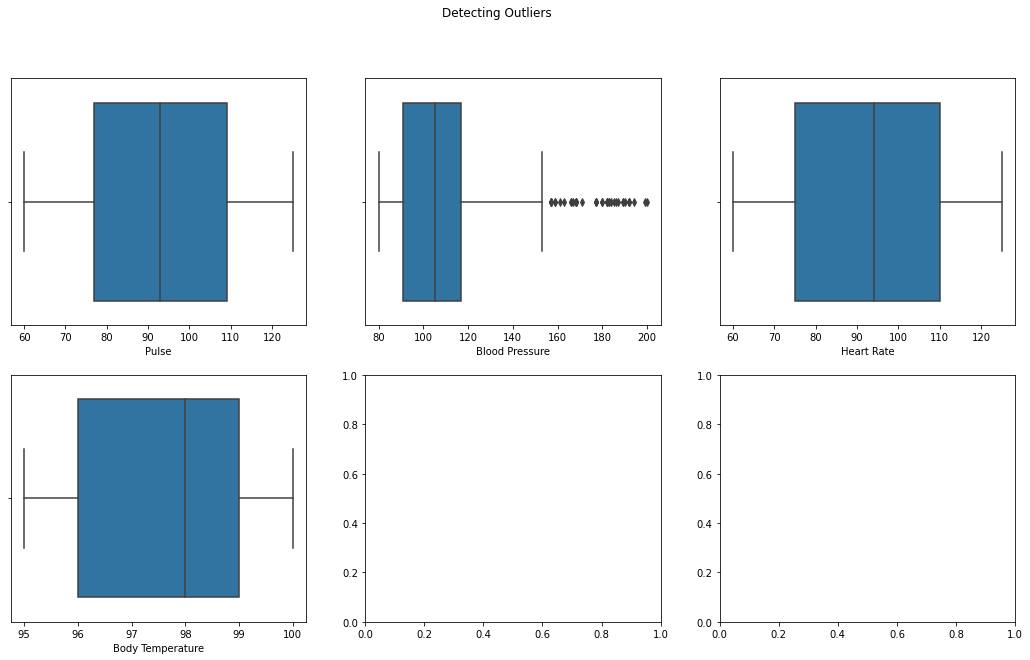

In [688]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Detecting Outliers')

sns.boxplot(ax=axes[0, 0],x=sh3_df['Pulse'])
sns.boxplot(ax=axes[0, 1],x=sh3_df['Blood Pressure'])
sns.boxplot(ax=axes[0, 2],x=sh3_df['Heart Rate'])
sns.boxplot(ax=axes[1, 0],x=sh3_df['Body Temperature'])

In [689]:
remove_outlier(sh3_df,'Blood Pressure')

<AxesSubplot:xlabel='Blood Pressure'>

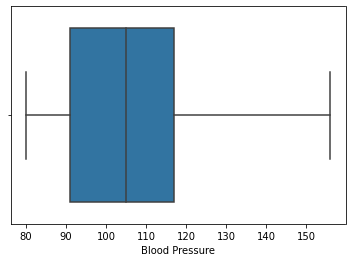

In [698]:
sns.boxplot(x=sh3_df['Blood Pressure'])

In [856]:
## Blood Sugar and Sugar Category are same. Difference is just in their types. Taking Sugar Category as Label 

In [690]:
X=sh3_df.drop(columns=['Sugar Catogery'],axis=1)
y=sh3_df['Sugar Catogery']

In [691]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [692]:
X_train,X_test=transf_pipeline(X_train,X_test,X.columns)

### KNN


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.60      0.51        30
           1       0.27      0.18      0.22        22
           2       0.28      0.24      0.26        21

    accuracy                           0.37        73
   macro avg       0.33      0.34      0.33        73
weighted avg       0.35      0.37      0.35        73




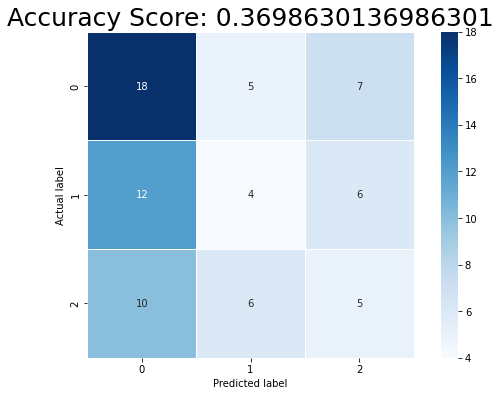

In [693]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)
y_pred=classifier_KNN.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

### Naive Bayes


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.30      0.36        30
           1       0.38      0.36      0.37        22
           2       0.25      0.38      0.30        21

    accuracy                           0.34        73
   macro avg       0.36      0.35      0.34        73
weighted avg       0.37      0.34      0.35        73




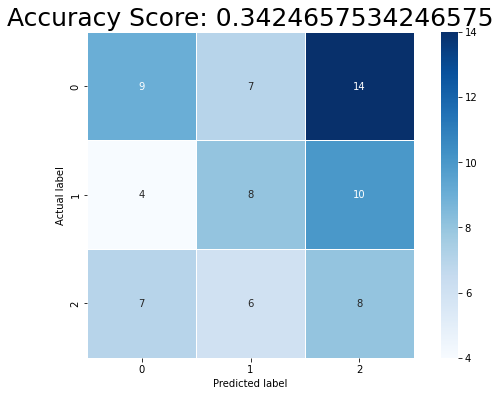

In [694]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred = classifier_NB.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

### SVM


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        30
           1       0.25      0.14      0.18        22
           2       0.33      0.38      0.36        21

    accuracy                           0.36        73
   macro avg       0.33      0.34      0.33        73
weighted avg       0.34      0.36      0.34        73




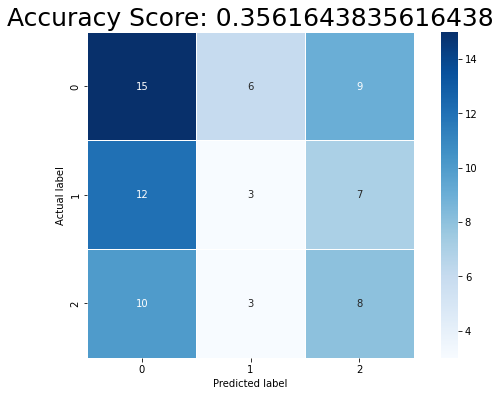

In [695]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'poly', random_state = 0)
classifier_SVM.fit(X_train, y_train)
y_pred = classifier_SVM.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

### Random Forest


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.22      0.27      0.24        30
           1       0.26      0.23      0.24        22
           2       0.24      0.19      0.21        21

    accuracy                           0.23        73
   macro avg       0.24      0.23      0.23        73
weighted avg       0.24      0.23      0.23        73




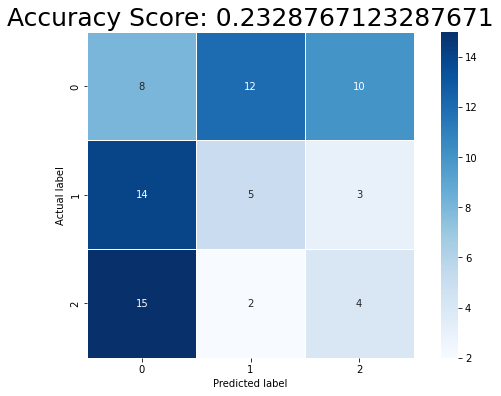

In [696]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

## Per Day Patient

In [714]:
sh4_df=pd.read_excel("DataSet_DS_ML.xlsx", header=1,sheet_name=3)

In [715]:
sh4_df.head()

,Patient Name,Gender,Patient ID,Date,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar
0,Amelia Nixon,female,400,2015-01-01 10:00:00.000,43,97,107,118,118,0,Low
1,Clara Hicks,female,401,2015-01-02 10:00:00.000,37,95,96,100,120,0,Low
2,Mason Brown,male,402,2015-01-03 09:59:59.995,44,97,111,105,115,1,Normal
3,Michael Rice,male,403,2015-01-04 09:59:59.995,36,98,95,66,88,0,Low
4,Eleanor Ritter,female,404,2015-01-05 09:59:59.995,45,95,92,99,86,1,Normal


In [716]:
sh4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Patient Name      2000 non-null   object        
 1   Gender            2000 non-null   object        
 2   Patient ID        2000 non-null   int64         
 3   Date              2000 non-null   datetime64[ns]
 4   Age               2000 non-null   int64         
 5   Body Temperature  2000 non-null   int64         
 6   Heart Rate        2000 non-null   int64         
 7   Pulse             2000 non-null   int64         
 8   Blood Pressure    2000 non-null   int64         
 9   Sugar Catogery    2000 non-null   int64         
 10  Blood Sugar       2000 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 172.0+ KB


In [857]:
## Adding features of day, month,year

In [717]:
sh4_df['Year']=sh4_df.Date.dt.year

In [718]:
sh4_df['Month']=sh4_df.Date.dt.month

In [719]:
sh4_df['Day']=sh4_df.Date.dt.day

In [837]:
sh4_df.head()

,Patient Name,Gender,Patient ID,Date,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Sugar Catogery,Blood Sugar,Year,Month,Day
0,Amelia Nixon,0,400,2015-01-01 10:00:00.000,43,97,107,118,118.0,0,Low,2015,1,1
1,Clara Hicks,0,401,2015-01-02 10:00:00.000,37,95,96,100,120.0,0,Low,2015,1,2
2,Mason Brown,1,402,2015-01-03 09:59:59.995,44,97,111,105,115.0,1,Normal,2015,1,3
3,Michael Rice,1,403,2015-01-04 09:59:59.995,36,98,95,66,88.0,0,Low,2015,1,4
4,Eleanor Ritter,0,404,2015-01-05 09:59:59.995,45,95,92,99,86.0,1,Normal,2015,1,5


### Detecting and Removing Outlier

<AxesSubplot:xlabel='Age'>

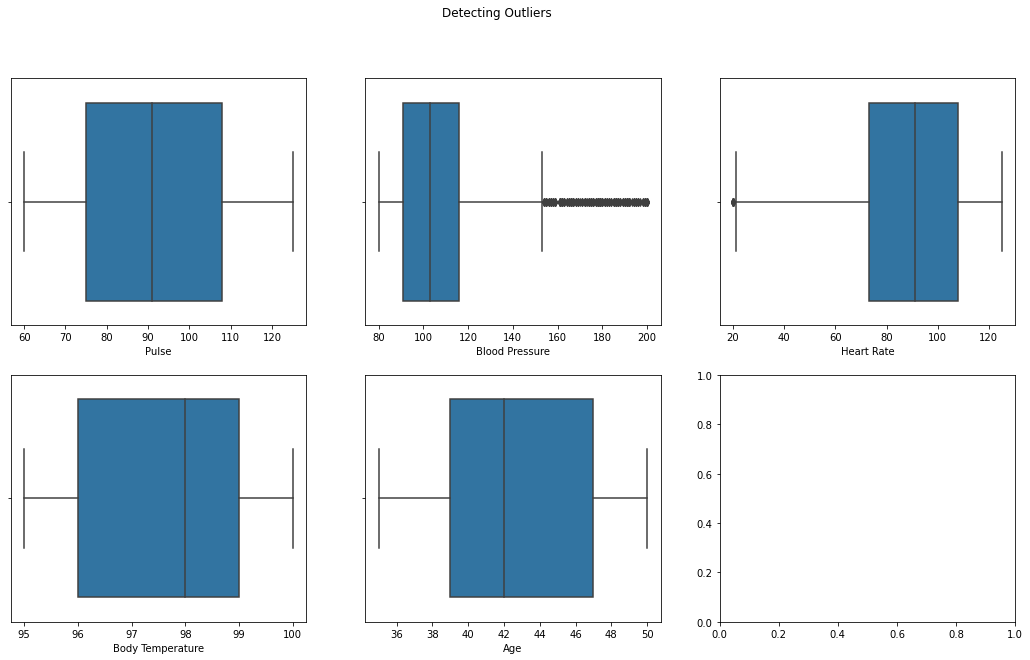

In [720]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Detecting Outliers')

sns.boxplot(ax=axes[0, 0],x=sh4_df['Pulse'])
sns.boxplot(ax=axes[0, 1],x=sh4_df['Blood Pressure'])
sns.boxplot(ax=axes[0, 2],x=sh4_df['Heart Rate'])
sns.boxplot(ax=axes[1, 0],x=sh4_df['Body Temperature'])
sns.boxplot(ax=axes[1, 1],x=sh4_df['Age'])

In [721]:
remove_outlier(sh4_df,'Blood Pressure')

<AxesSubplot:xlabel='Blood Pressure'>

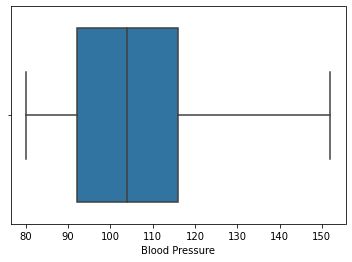

In [722]:
sns.boxplot(x=sh2_df['Blood Pressure'])

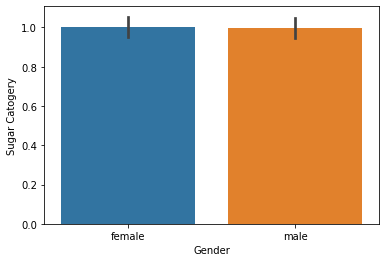

In [723]:
ax= sns.barplot(x="Gender", y="Sugar Catogery", data=sh4_df)

<AxesSubplot:xlabel='Year,Sugar Catogery'>

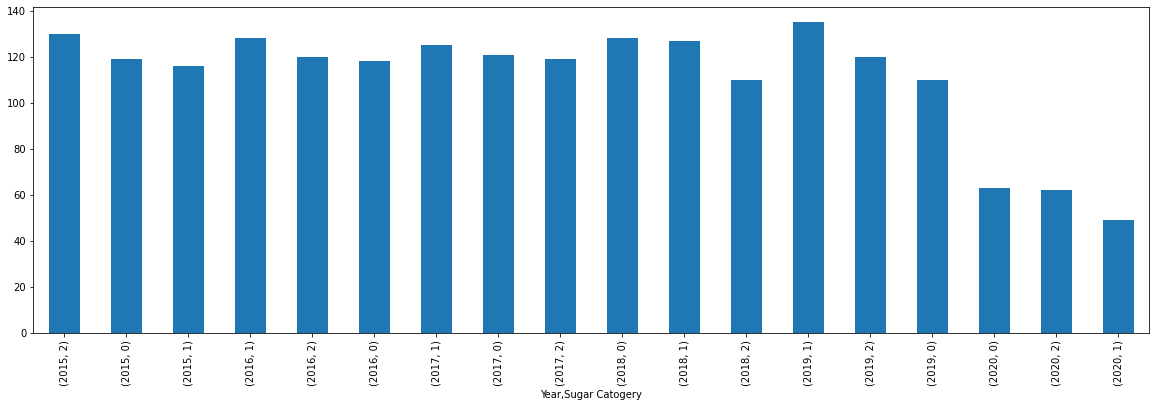

In [770]:
sh4_df.groupby('Year')['Sugar Catogery'].value_counts().plot(kind='bar',figsize=(20,6))

<AxesSubplot:xlabel='Year'>

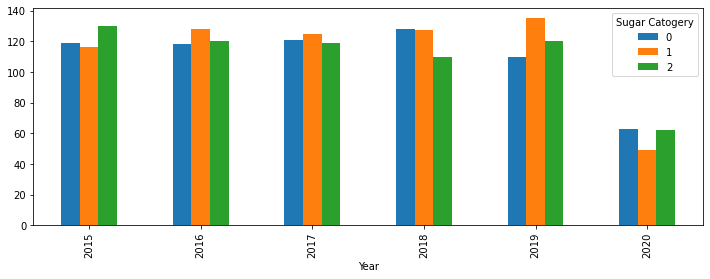

In [782]:
sh4_df_year=sh4_df.pivot_table(index='Year', columns='Sugar Catogery',  aggfunc='size')
sh4_df_year.plot(kind='bar',figsize=(12,4))

In [858]:
## Trend over past 5 years for blood sugar level

<AxesSubplot:xlabel='Month'>

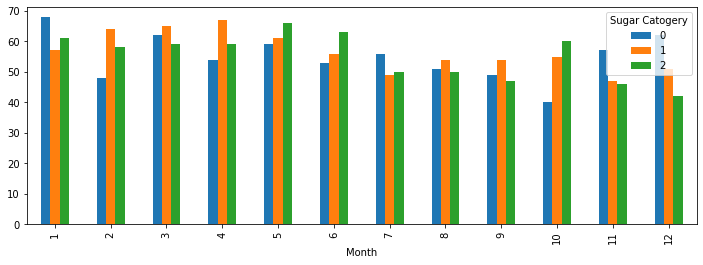

In [781]:
sh4_df_month=sh4_df.pivot_table(index='Month', columns='Sugar Catogery',  aggfunc='size')
sh4_df_month.plot(kind='bar',figsize=(12,4))

<AxesSubplot:xlabel='Day'>

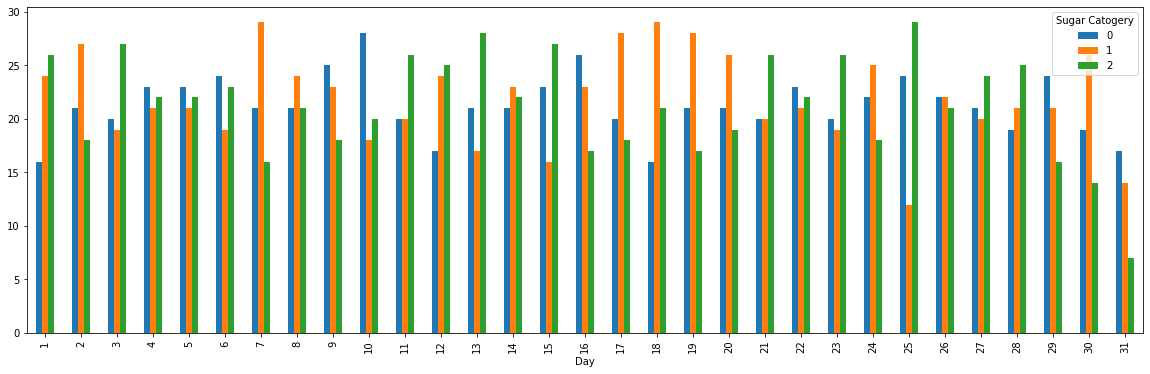

In [839]:
sh4_df_day=sh4_df.pivot_table(index='Day', columns='Sugar Catogery',  aggfunc='size')
sh4_df_day.plot(kind='bar',figsize=(20,6))

In [725]:
sh4_df['Gender'].replace({'female':0,'male':1},inplace=True)

In [742]:
X=sh4_df.drop(columns=['Sugar Catogery','Date','Blood Sugar','Patient ID','Patient Name'],axis=1)
y=sh4_df['Sugar Catogery']

In [743]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [744]:
X_train.head()

,Gender,Age,Body Temperature,Heart Rate,Pulse,Blood Pressure,Year,Month,Day
582,1,36,97,87,80,116.0,2016,8,5
159,1,45,99,93,73,94.0,2015,6,9
1827,0,46,98,116,117,96.0,2020,1,2
318,0,48,100,61,94,153.5,2015,11,15
708,1,46,96,89,69,85.0,2016,12,9


In [745]:
X_train,X_test=transf_pipeline(X_train,X_test,X.columns)

### KNN


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.34      0.41      0.37       135
           1       0.28      0.35      0.32       130
           2       0.29      0.16      0.20       135

    accuracy                           0.31       400
   macro avg       0.30      0.31      0.30       400
weighted avg       0.30      0.31      0.30       400




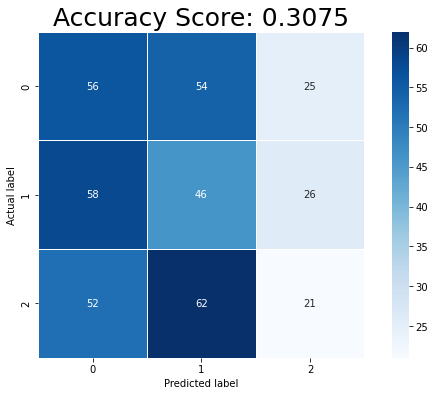

In [746]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)
y_pred=classifier_KNN.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)


### Naive Bayes


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.26      0.31       135
           1       0.28      0.36      0.31       130
           2       0.37      0.37      0.37       135

    accuracy                           0.33       400
   macro avg       0.34      0.33      0.33       400
weighted avg       0.34      0.33      0.33       400




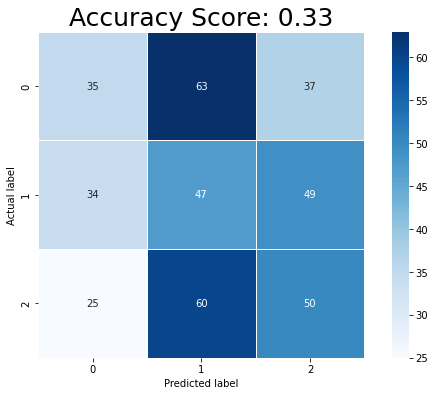

In [747]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred = classifier_NB.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

### SVM


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.35      0.33      0.34       135
           1       0.26      0.35      0.30       130
           2       0.31      0.23      0.26       135

    accuracy                           0.30       400
   macro avg       0.31      0.30      0.30       400
weighted avg       0.31      0.30      0.30       400




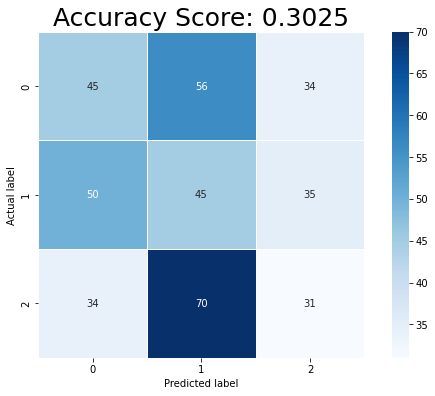

In [748]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'poly', random_state = 0)
classifier_SVM.fit(X_train, y_train)
y_pred = classifier_SVM.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)

### Random Forest


============================== Model Evaluation ==============================

Classification report:
               precision    recall  f1-score   support

           0       0.33      0.36      0.34       135
           1       0.32      0.38      0.35       130
           2       0.33      0.24      0.28       135

    accuracy                           0.33       400
   macro avg       0.33      0.33      0.32       400
weighted avg       0.33      0.33      0.32       400




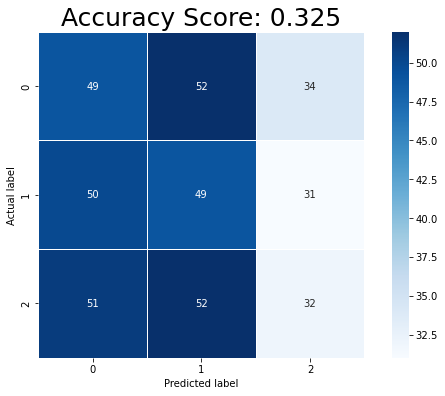

In [749]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)
accuracy=class_report(y_test,y_pred)
conf_matrix(y_test,y_pred,accuracy)